## Import Modules

In [1]:
!pip install pingouin
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from minirig import load_csv_dataset
import pingouin as pg

## Global Variables

In [4]:
data_dir = Path('../data')
cache_dir_github = data_dir.joinpath('github')
bots_dataset_path = data_dir.joinpath('final-dataset.csv')
bots_dataset_funcionality_path = data_dir.joinpath('bots-dataset-functionality.csv')
tasks_df = pd.read_csv(bots_dataset_path)
functionality_df = pd.read_csv(bots_dataset_funcionality_path)

## Demographics

### Distribution of bots per amount of issues

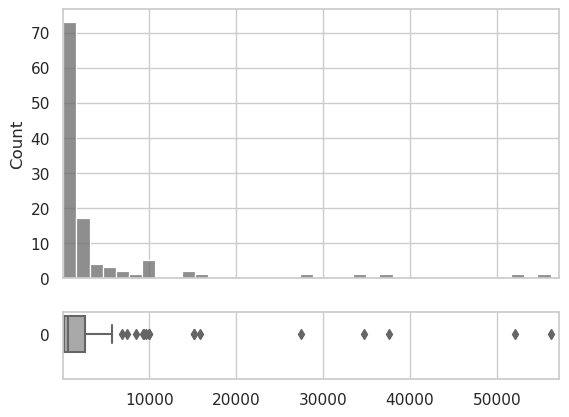

In [131]:
df['total_issues'] = df['total-issues-td'] + df['total-issues-non-td']

sns.set_style("whitegrid")

# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_hist,ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.80, .20)})
 
# assigning a graph to each ax
sns.histplot(data=df, x="total_issues", ax=ax_hist, bins=int(max(df['total_issues'])/1500), color='dimgray')
sns.boxplot(df["total_issues"], orient="h", ax=ax_box, color='darkgray')

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_box.set(ylabel='')
ax_hist.set(alpha=0)

plt.xlim(min(df['total_issues']), max(df['total_issues']) + 1000)
plt.ylim(1, )
plt.savefig('../figures/distribution-of-bots-per-number-of-issues.pdf', bbox_inches='tight')

### Bots per task

In [ ]:
open = bots_df['create'].sum()
close = bots_df['comment'].sum()
comment = bots_df['close'].sum()
plt.barh(y = [1, 2, 3], width=[comment, close, open])
plt.rcParams["figure.figsize"] = (6,1)

plt.yticks([1,2,3], ['comment', 'close', 'open'])

plt.savefig('../figures/amount-of-bots-per-task.pdf', bbox_inches='tight')



In [157]:
df['total_issues'].median()

664.0

## Intuition \#1: *Bots open fewer issues documenting TD than not documenting TD.*

#### 1.1. Selecting bots that open issues

In [208]:
bots_open_issues = df.loc[(df['opened-satd'] >= 1) | (df['opened-non-satd'] >= 1)]
len(bots_open_issues)

76

#### 1.2. No normalization

In [132]:
results = pg.mwu(x=bots_open_issues['opened-satd'], 
                             y=bots_open_issues['opened-non-satd'], 
                             alternative='less',
                             method='auto', 
                             nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,2157.0,less,0.00346,0.253116,0.626558


#### 1.3. Normalization by proportion

In [203]:
results = pg.mwu(x=bots_open_issues['opened-satd-norm-bot'], 
                   y=bots_open_issues['opened-non-satd-norm-bot'], 
                   alternative='less',
                   method='auto', 
                   nan_policy='raise')

results

,U-val,alternative,p-val,RBC,CLES
MWU,1614.0,less,0.000001,0.441136,0.720568


#### 1.4. Normalization by population

In [204]:
results = pg.mwu(x=bots_open_issues['opened-satd-norm-pop'], 
                             y=bots_open_issues['opened-non-satd-norm-pop'], 
                             alternative='less',
                             method='auto', 
                             nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,2519.5,less,0.086673,0.127597,0.563798


In [184]:
results = pg.mwu(x=bots_open_issues['opened-satd-norm-pop'], 
                             y=bots_open_issues['opened-non-satd-norm-pop'], 
                             alternative='greater',
                             method='auto', 
                             nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,2519.5,greater,0.91391,0.127597,0.436202


In [185]:
results = pg.mwu(x=bots_open_issues['opened-satd-norm-pop'], 
                             y=bots_open_issues['opened-non-satd-norm-pop'], 
                             alternative='two-sided',
                             method='auto', 
                             nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,2519.5,two-sided,0.173346,0.127597,0.436202


## Intuition \#2: *Bots close fewer issues documenting TD than not documenting TD.*

#### Selecting bots that close issues

In [135]:
bots_close_issues = df.loc[(df['closed-satd'] >= 1) | (df['closed-non-satd'] >= 1)]
len(bots_close_issues)

79

#### 2.1. No normalization

In [164]:
results = pg.mwu(x=bots_close_issues['closed-satd'], 
                 y=bots_close_issues['closed-non-satd'], 
                 alternative='less',
                 method='auto', 
                 nan_policy='raise')

results

,U-val,alternative,p-val,RBC,CLES
MWU,2509.0,less,0.016715,0.195962,0.597981


#### 2.2.  Normalization by proportion

In [205]:
results = pg.mwu(x=bots_close_issues['closed-satd-norm-bot'], 
                 y=bots_close_issues['closed-non-satd-norm-bot'], 
                 alternative='less',
                 method='auto', 
                 nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,1818.5,less,0.000003,0.417241,0.70862


#### 2.3. Normalization by population

In [200]:
results = pg.mwu(x=bots_close_issues['closed-satd-norm-pop'], 
                 y=bots_close_issues['closed-non-satd-norm-pop'], 
                 alternative='less',
                 method='auto', 
                 nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,3478.0,less,0.893681,-0.114565,0.442718


In [201]:
results = pg.mwu(x=bots_close_issues['closed-satd-norm-pop'], 
                 y= bots_close_issues['closed-non-satd-norm-pop'],
                 alternative='greater',
                 method='auto', 
                 nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,3478.0,greater,0.106959,-0.114565,0.557282


In [188]:
results = pg.mwu(x=bots_close_issues['closed-satd-norm-pop'], 
                 y=bots_close_issues['closed-non-satd-norm-pop'], 
                 alternative='two-sided',
                 method='auto', 
                 nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,3478.0,two-sided,0.213918,-0.114565,0.557282


## Intuition \#3: *Bots comments in fewer issues documenting TD than in not documenting TD.*

#### 3.1. Selecting bots that comment in issues

In [149]:
bots_comments_issues = df.loc[(df['comments-satd'] >= 1) | (df['comments-non-satd'] >= 1)]
len(bots_close_issues)

79

#### 3.2. No normalization

In [153]:
results = pg.mwu(x=bots_comments_issues['comments-satd'], 
                 y=bots_comments_issues['comments-non-satd'], 
                 alternative='two-sided',
                 method='auto', 
                 nan_policy='raise')

results

,U-val,alternative,p-val,RBC,CLES
MWU,3326.5,two-sided,0.000044,0.3347,0.33265


#### 3.3. Normalization per bot (proportion)

In [154]:
results = pg.mwu(x=bots_comments_issues['comments-satd-norm-bot'], 
                 y=bots_comments_issues['comments-non-satd-norm-bot'], 
                 alternative='two-sided',
                 method='auto', 
                 nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,508.0,two-sided,5.053469e-28,0.8984,0.0508


#### 3.4. Normalization per population

In [206]:
results = pg.mwu(x=bots_comments_issues['comments-satd-norm-pop'], 
                 y=bots_comments_issues['comments-non-satd-norm-pop'],
                 alternative='two-sided',
                 method='auto', 
                 nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,4629.5,two-sided,0.365957,0.0741,0.46295


In [207]:
results = pg.mwu(x=bots_comments_issues['comments-satd-norm-pop'], 
                 y=bots_comments_issues['comments-non-satd-norm-pop'],
                 alternative='less',
                 method='auto', 
                 nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,4629.5,less,0.182978,0.0741,0.53705


In [197]:
results = pg.mwu(x=bots_comments_issues['comments-satd-norm-pop'], 
                 y=bots_comments_issues['comments-non-satd-norm-pop'],
                 alternative='greater',
                 method='auto', 
                 nan_policy='raise')
results

,U-val,alternative,p-val,RBC,CLES
MWU,4629.5,greater,0.817669,0.0741,0.46295


## 4. Check bots' functionality

In [5]:
merged_bots_df = tasks_df.merge(functionality_df, left_on='bot', right_on='account')

In [6]:
merged_bots_df.keys()

Index(['bot', 'opened-satd', 'opened-non-satd', 'closed-satd',
       'closed-non-satd', 'comments-satd', 'comments-non-satd',
       'total-issues-td', 'total-issues-non-td', 'opened-satd-norm-bot',
       'opened-non-satd-norm-bot', 'closed-satd-norm-bot',
       'closed-non-satd-norm-bot', 'comments-satd-norm-bot',
       'comments-non-satd-norm-bot', 'opened-satd-norm-pop',
       'opened-non-satd-norm-pop', 'closed-satd-norm-pop',
       'closed-non-satd-norm-pop', 'comments-satd-norm-pop',
       'comments-non-satd-norm-pop', 'account', 'issue_count', 'n-projects',
       'issues-opening', 'issues-closing', 'n-comments', 'issues-commenting',
       'functionality-descriptive', 'issues-analyzed', 'create', 'comment',
       'label', 'close', 'trigger-automated', 'trigger-manual', 'trigger-both',
       'other-remarks', 'assign', 'completed', 'is-bot', 'merge-pr',
       'create-milestone', 'reopen', 'lock', 'functionality-group'],
      dtype='object')

In [7]:
df = merged_bots_df.loc[:,['bot', 'account', 'opened-satd', 'closed-satd', 'comments-satd', 'opened-non-satd', 'closed-non-satd', 'comments-non-satd', 'functionality-descriptive']]

In [19]:
opened_issues = df.loc[:,['bot', 'functionality-descriptive', 'opened-satd', 'opened-non-satd','closed-satd', 'closed-non-satd', 'comments-satd', 'comments-non-satd']]
opened_issues['functionality-open'] = '-'
opened_issues['functionality-close'] = '-'
opened_issues['functionality-comments'] = '-'

opened_issues.to_csv(data_dir.joinpath("coding-functionality").joinpath("functionality.csv"))

In [14]:
close_issues = df.loc[(df['closed-satd'] >= 1) | (df['closed-non-satd'] >= 1), ['bot', 'functionality-descriptive']]
close_issues['functionality-close'] = '-'

close_issues.to_csv(data_dir.joinpath("coding-functionality").joinpath("close-issues-functionality.csv"))

In [15]:
comments_issues = df.loc[(df['comments-satd'] >= 1) | (df['comments-non-satd'] >= 1), ['bot', 'functionality-descriptive']]
comments_issues['functionality-close'] = '-'

comments_issues.to_csv(data_dir.joinpath("coding-functionality").joinpath("comments-issues-functionality.csv"))